In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df.job_posted_date=pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

df_da = df[df['job_title_short'] == 'Data Analyst']

In [2]:
import seaborn as sns

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

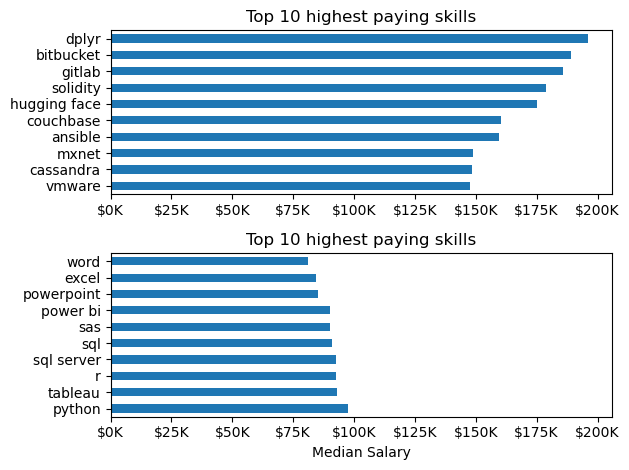

In [4]:
df_explode = df_DA_US.explode('job_skills')
df_explode.head()

df_pivot = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_top_salary = df_pivot.sort_values('median',ascending=False).head(10)
df_top_skills = df_pivot.sort_values('count',ascending=False).head(10).sort_values('median',ascending=False).head(10)

fig, ax = plt.subplots(2,1)

df_top_salary.plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 highest paying skills')
ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

df_top_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 highest paying skills')
ax[1].invert_yaxis()
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

fig.tight_layout()


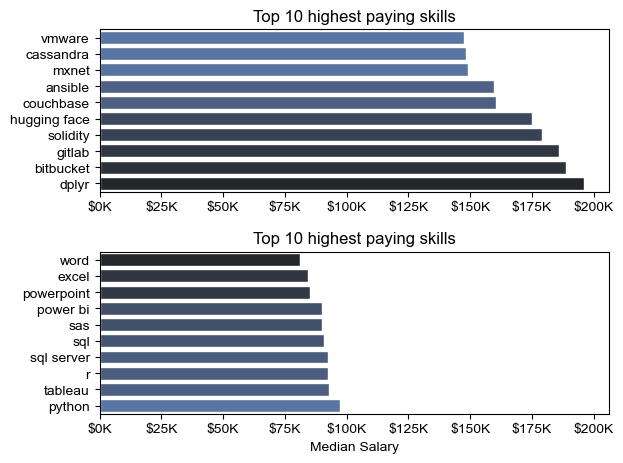

In [10]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_top_salary,x='median',y=df_top_salary.index,ax=ax[0],hue='median',palette='dark:b_r',legend=False)
#df_top_salary.plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 highest paying skills')
ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))


sns.barplot(data=df_top_skills,x='median',y=df_top_skills.index,ax=ax[1],hue='median',palette='dark:b', legend=False)
#df_top_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 highest paying skills')
ax[1].invert_yaxis()
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

fig.tight_layout()

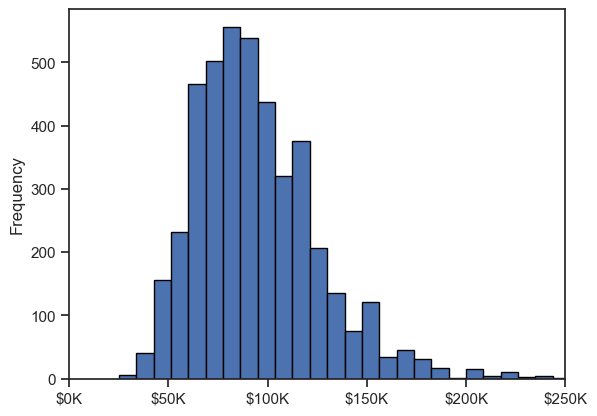

In [11]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor= 'black')
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

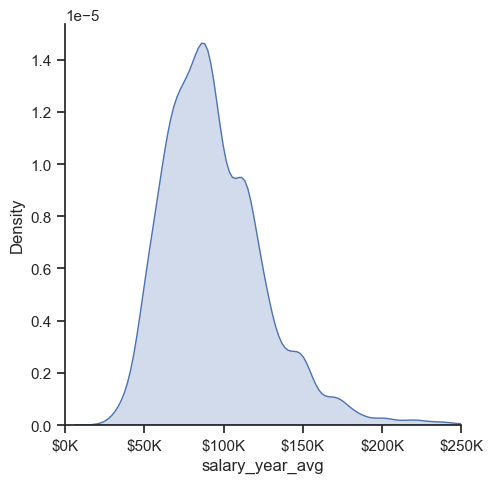

In [12]:
sns.displot(df_DA_US['salary_year_avg'],kind='kde',fill=True)
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

In [13]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

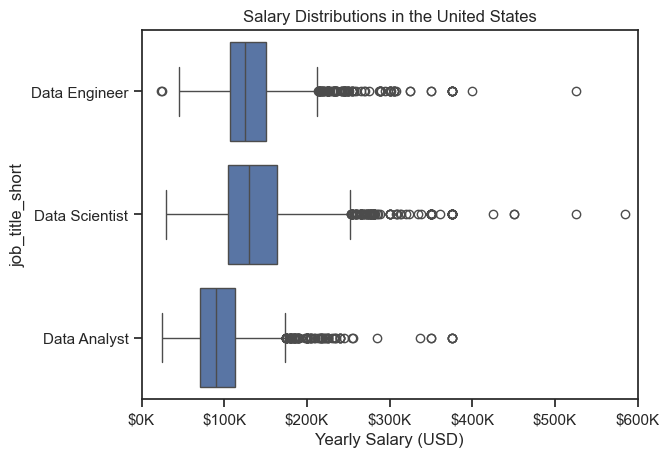

In [14]:
sns.boxplot(df_US,x='salary_year_avg',y='job_title_short')
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()